# Ejercicio 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#importamos las tablas
url_casos = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv"
url_camas = "https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv"
camas = pd.read_csv(url_camas,index_col=1, parse_dates=True)
casos = pd.read_csv(url_casos,index_col=0, parse_dates=True)

In [4]:
#importamos las tablas con un indice distinto a las fechas.
camas_fecha = pd.read_csv(url_camas,parse_dates=["fecha"])
casos_fecha = pd.read_csv(url_casos,parse_dates=["fecha"])

In [5]:
camas.head(2)

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
fecha,,,,,,,,,,,,,,,,,,
2020-09-25,131,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
2020-09-24,130,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


In [6]:
casos.head(2)

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
fecha,,,,,,,,,,
2020-06-30,106,29,71,6,574,23,342,2338,181,0
2020-07-01,114,31,77,6,581,22,342,2207,172,0


In [7]:
camas_fecha.head(2)

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


In [8]:
casos_fecha.head(2)

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0


Podemos ver el crecimiento de los los casos confirmados, los activos y los decesos en le sig. grafico:

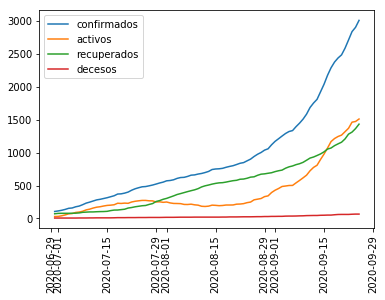

In [9]:
fig, ax = plt.subplots()
ax.plot(casos_fecha['fecha'],casos_fecha['confirmados'])
ax.plot(casos_fecha['fecha'],casos_fecha['activos'])
ax.plot(casos_fecha['fecha'],casos_fecha['recuperados'])
ax.plot(casos_fecha['fecha'],casos_fecha['decesos'])
ax.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

Los casos confirmados parecen mostrar un crecimiento exponencial, compatible con el comienzo de una pandemia. Al finalizar, tendria que observarse una curva gausiana, estos valores parecen seguir un comportamiento gausiano. A medida que crecen los casos confirmados, es esperable que aumente la ocupacion de camas covid:

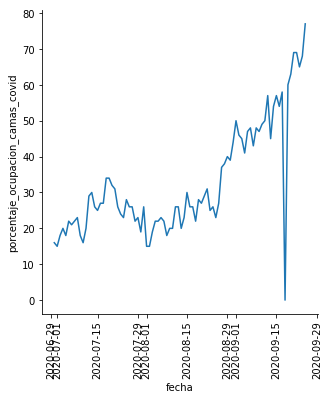

In [10]:
ax = sns.relplot(data=camas_fecha, x="fecha", y="porcentaje_ocupacion_camas_covid", kind="line")
ax.set_xticklabels(rotation=90)
plt.show()

Podriamos esperar que el porcentaje de ocupacion de las camas sean proporcionales al numero de personas contagiadas activas:

C:\Users\laure\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


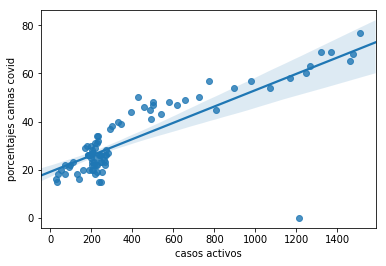

In [11]:
activos_camas = pd.DataFrame({"casos activos":casos['activos'],"porcentajes camas covid":camas['porcentaje_ocupacion_camas_covid']})
sns.regplot(data=activos_camas, x="casos activos", y="porcentajes camas covid")

Podriamos usar el grafico anterior para cualcular cuando es el limite de saturacion del sistema.
En un modelo sencillo podemos plantear que los porcentaje de camas de terapia intesiva de covid aumentan con los activos y dismiuyen con los decesos.
UTI = f(activos-decesos)

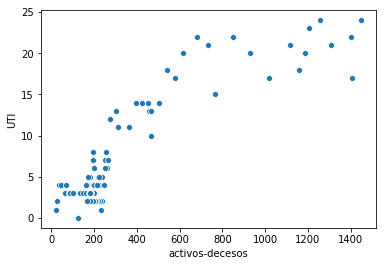

In [12]:
uti_activos_decesos = pd.DataFrame({"activos-decesos":(casos['activos'] -casos['decesos']) ,"UTI":camas['uti_covid_ocupadas']})
sns.scatterplot(data=uti_activos_decesos, x="activos-decesos",y="UTI")

Pareciera que sigue una curva logaritmica. Si graficamos las camas UTI en funcion del log(activos-decesos):

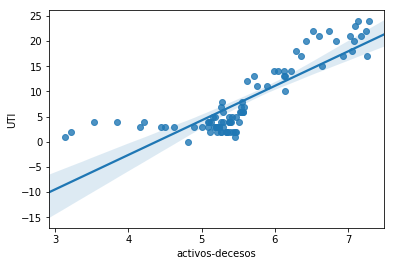

In [13]:
uti_activos_decesos = pd.DataFrame({"activos-decesos":np.log(casos['activos'] -casos['decesos']) ,"UTI":camas['uti_covid_ocupadas']})
sns.regplot(data=uti_activos_decesos, x="activos-decesos",y="UTI")

Tambien podemos calcular la letalidad en funcion del tiempo.

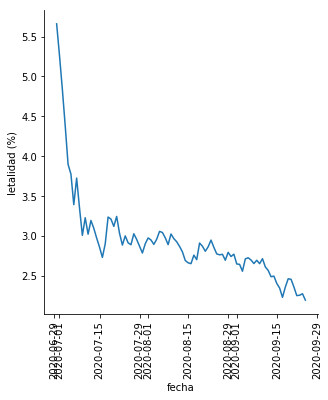

In [14]:
#leatilidad
letalidad = pd.DataFrame({"fecha":casos_fecha['fecha'],"letalidad (%)":(casos_fecha['decesos']/casos_fecha['confirmados'])*100})
#letalidad.head()
ax = sns.relplot(data=letalidad, x="fecha", y="letalidad (%)", kind="line")
ax.set_xticklabels(rotation=90)
plt.show()

Al cominenzo de la pandemia la letalidad fue alta, con el tiempo este valor fue convergiendo a un numero mas bajo. Esto explicaria por que al principio, cuando habia menos casos, el numero de respiradores utilizados era bajo pero la letalidad alta. Esto es al reves de lo que se podria esperar, ya que la mortalidad aumenta bruscamente cuando escacean los respiradores.


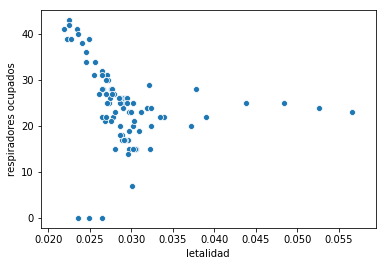

In [15]:
respiradores_UTI = pd.DataFrame({"letalidad":(casos['decesos']/casos['confirmados']) ,"respiradores ocupados":camas['respiradores_ocupados']})
sns.scatterplot(data=respiradores_UTI, x="letalidad",y="respiradores ocupados")

# Ejercicio 2

Definimos las funciones de valores pseudo-aleatoreos para crear la lista de datos etiquetados (True & False)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
def gausianas(mu_v,mu_f,sigma_v,sigma_f):
    """ Distribucion Gausiana para dos valores T (True) y F (False)  """
    np.random.seed(1)
    T = np.random.normal(loc = mu_v,scale = sigma_v,size = 50)
    F = np.random.normal(loc = mu_f,scale = sigma_f,size = 50)
    sns.distplot(T,color = "blue",label="T")
    sns.distplot(F,color = "g",label="F")
    plt.legend(loc="best")
    plt.show()
    return T,F

Definimos dos gausianas con dos distintos valores medios (mu) y dos disperciones distintas (sigma).

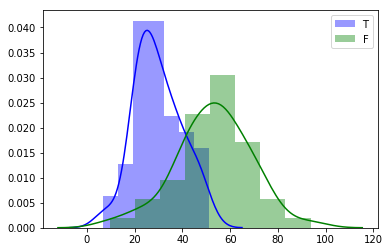

In [108]:
T,F = gausianas(30,50,10,20)

Definimos una funcion para hacer el dataset con estas listas etiquetadas y para relizar la curva ROC

In [109]:
def curva_ROC(T,F):
    """Curva ROC para dos datos etiquetados True y False"""
    dataset = np.concatenate((T,F))
    dataset = sorted(dataset)
    FPR = np.zeros(len(dataset))
    TPR = np.zeros(len(dataset))
    delta_FPR = 1/len(T)
    delta_TPR = 1/len(F)
    fpr = 0
    tpr = 0
    for i in range(len(dataset)):
        X = dataset[i]
        if X in T:
            tpr += delta_TPR
        else:
            fpr += delta_FPR
        FPR[i] = fpr
        TPR[i] = tpr
    plt.plot(FPR,TPR)
    plt.ylabel("TPR")
    plt.xlabel("FPR")
    plt.show()
    return (FPR,TPR,dataset)

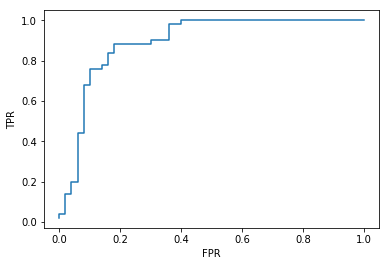

In [110]:
FPR,TPR,dataset = curva_ROC(T,F)

Definimos una funcion que encuentre los puntos que minimizan la distancia con (0,1), para poder definir el umbral. La funcion deberia avisar si existe un punto que cumple esa condicion o son varios.

In [111]:
def valor_umbral(FPR,TPR,dataset):
    """Selecciona los puntos que minimizan la distancia con (0,1) para posibles valores de umbrales"""
    #distancia d al punto (0,1) de la curva ROC
    d =(FPR**2 + (TPR-1)**2)**1/2
    #puntos posbiles umbrales
    umbral = [dataset[i] for i in range(len(d)) if (d[i] == min(d))]
    if (len(umbral) == 1):
        print("Existe un solo punto umbral")
    else:
        print("exiten varios puntos posibles para umbral")
    return umbral

In [112]:
umbral = valor_umbral(FPR,TPR,dataset)
print(umbral)

Existe un solo punto umbral
[41.447237098396144]


Graficamos este punto en la curva ROC para confirmar si esta bien.

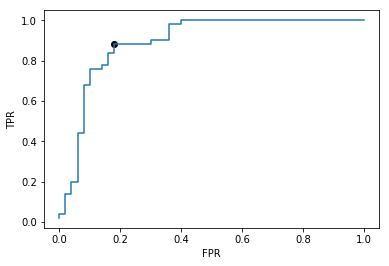

In [94]:
i = dataset.index(umbral)
plt.plot(FPR,TPR)
plt.scatter(FPR[i],TPR[i],color = "black")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()

Definimos una funcion para realizar la matriz de confusion

In [95]:
def matriz_confusion(umbral,V,F,dataset):
    '''devuelve matriz de confusion, V = valores verdaderos, F = valores falsos, dataset = dataset a analizar  '''
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for x in dataset:
        Predicted = x < umbral
        #print(Predicted)
        label = x in V
        if Predicted:
            if Predicted == label :
                TP += 1
            else:
                FP += 1
        else:
            if Predicted == label :
                TN += 1
            else:
                FN += 1
    return TP,FP,TN,FN

Calculamos las medidas de evaluacion del modelo.

In [96]:
TP,FP,TN,FN = matriz_confusion(umbral,T,F,dataset)
FPR = FP /(FP + TN)
print("FPR: " + str(FPR))
TPR = TP / (TP + FN)
print("TPR: " + str(TPR))
Especificidad = TN / (FP + TN)
print("Especificidad: " + str(Especificidad))
Accuracy = (TP +TN) / (TN + TP + FN + FP)
print("Accuracy: " + str(Accuracy))
Presicion = TP / (TP + FP)
print("Presicion: " + str(Presicion))
Prevalencia = (TP + FN) / (TN + TP + FN + FP)
print("Prevalencia: " + str(Prevalencia))
f_measure = (2*Presicion*TPR) / (Presicion + TPR)
print("f-measure: " + str(f_measure))
IoU = TP / (TP+FP+FN)
print("Indice Jaccard: " + str(IoU))

FPR: 0.18
TPR: 0.86
Especificidad: 0.82
Accuracy: 0.84
Presicion: 0.8269230769230769
Prevalencia: 0.5
f-measure: 0.8431372549019608
Indice Jaccard: 0.7288135593220338


Por los resultados parece que el valor de umbral es util para dividir la clasificacion. Si tomamaros otros valores de umbral,  ¿Que pasaria?

In [97]:
TP,FP,TN,FN = matriz_confusion(umbral[0]-10,T,F,dataset)
FPR = FP /(FP + TN)
print("FPR: " + str(FPR))
TPR = TP / (TP + FN)
print("TPR: " + str(TPR))
Especificidad = TN / (FP + TN)
print("Especificidad: " + str(Especificidad))
Accuracy = (TP +TN) / (TN + TP + FN + FP)
print("Accuracy: " + str(Accuracy))
Presicion = TP / (TP + FP)
print("Presicion: " + str(Presicion))
Prevalencia = (TP + FN) / (TN + TP + FN + FP)
print("Prevalencia: " + str(Prevalencia))
f_measure = (2*Presicion*TPR) / (Presicion + TPR)
print("f-measure: " + str(f_measure))
IoU = TP / (TP+FP+FN)
print("Indice Jaccard: " + str(IoU))

FPR: 0.08
TPR: 0.62
Especificidad: 0.92
Accuracy: 0.77
Presicion: 0.8857142857142857
Prevalencia: 0.5
f-measure: 0.7294117647058823
Indice Jaccard: 0.5740740740740741


In [98]:
TP,FP,TN,FN = matriz_confusion(umbral[0]+10,T,F,dataset)
FPR = FP /(FP + TN)
print("FPR: " + str(FPR))
TPR = TP / (TP + FN)
print("TPR: " + str(TPR))
Especificidad = TN / (FP + TN)
print("Especificidad: " + str(Especificidad))
Accuracy = (TP +TN) / (TN + TP + FN + FP)
print("Accuracy: " + str(Accuracy))
Presicion = TP / (TP + FP)
print("Presicion: " + str(Presicion))
Prevalencia = (TP + FN) / (TN + TP + FN + FP)
print("Prevalencia: " + str(Prevalencia))
f_measure = (2*Presicion*TPR) / (Presicion + TPR)
print("f-measure: " + str(f_measure))
IoU = TP / (TP+FP+FN)
print("Indice Jaccard: " + str(IoU))

FPR: 0.4
TPR: 1.0
Especificidad: 0.6
Accuracy: 0.8
Presicion: 0.7142857142857143
Prevalencia: 0.5
f-measure: 0.8333333333333333
Indice Jaccard: 0.7142857142857143


En general vemos que cuando nos movemos en un entorno del valor del umbral determinado por la curva ROC, aunque algunas medidas de evaluacion mejoran, en general la de la curva ROC representa un valor mas "balanceado" entre un umbral muy esceptico y uno muy credulo. Podemos medir como cambia el valor f-measure para verificar esto.

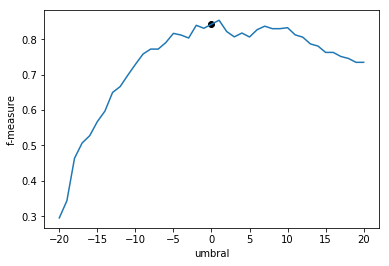

In [99]:
f_measure = []
umbrales = []
for i in range(-20,21):
    TP,FP,TN,FN = matriz_confusion(umbral[0]+i,T,F,dataset)
    TPR = TP / (TP + FN)
    Presicion = TP / (TP + FP)
    f_measure.append((2*Presicion*TPR) / (Presicion + TPR))
plt.plot(list(range(-20,21)),f_measure)
plt.scatter(0,f_measure[20],color="black")
plt.ylabel("f-measure")
plt.xlabel("umbral")
plt.show()

En el grafico anterior, el umbral cero representa el umbral calculado por la curva ROC, el punto negro representa el valor de f-measure para este umbral. Los demas valores, representan otros umbrales, por ej, 5 representa valor del umbral de la cruva ROC + 5,y asi sucesivamente. Vemos a que el maximo del valor de f-measure es alcanzado cerca de este punto, indicando que el valor de umbral de la curva ROC es buen candidato para ser usado con valores no etiquetados.
Ahora, si las gausianas fueran mas distantes entre si, es decir, la media estuviese alejada y la desviacion estandar se reduce, esperaria ver una curva ROC mas similar a la deal.
Por ejemplo:

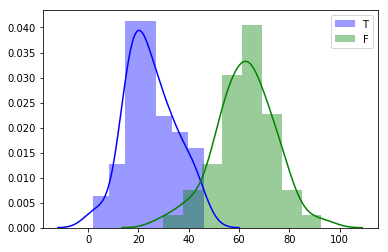

In [100]:
T,F = gausianas(25,60,10,15)

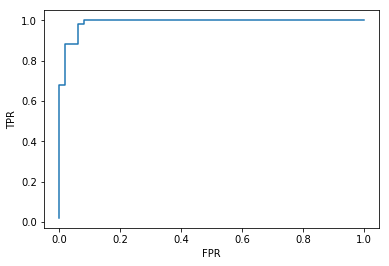

In [101]:
FPR,TPR,dataset = curva_ROC(T,F)

In [102]:
umbral = valor_umbral(FPR,TPR,dataset)
print(umbral)

Existe un solo punto umbral
[42.4481176421648]


In [103]:
TP,FP,TN,FN = matriz_confusion(umbral,T,F,dataset)
FPR = FP /(FP + TN)
print("FPR: " + str(FPR))
TPR = TP / (TP + FN)
print("TPR: " + str(TPR))
Especificidad = TN / (FP + TN)
print("Especificidad: " + str(Especificidad))
Accuracy = (TP +TN) / (TN + TP + FN + FP)
print("Accuracy: " + str(Accuracy))
Presicion = TP / (TP + FP)
print("Presicion: " + str(Presicion))
Prevalencia = (TP + FN) / (TN + TP + FN + FP)
print("Prevalencia: " + str(Prevalencia))
f_measure = (2*Presicion*TPR) / (Presicion + TPR)
print("f-measure: " + str(f_measure))
IoU = TP / (TP+FP+FN)
print("Indice Jaccard: " + str(IoU))

FPR: 0.06
TPR: 0.96
Especificidad: 0.94
Accuracy: 0.95
Presicion: 0.9411764705882353
Prevalencia: 0.5
f-measure: 0.9504950495049505
Indice Jaccard: 0.9056603773584906


Efectivamente, las medidas de evaluacion de los modelos mejoraron sustancialmente

Ahora "acercamos" las curvas gausianas, asi mas valores se superponen.

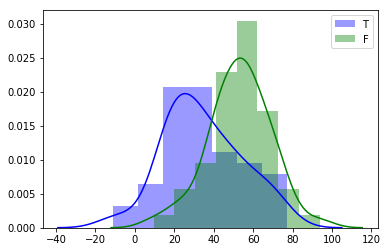

In [104]:
T,F = gausianas(35,50,20,20)

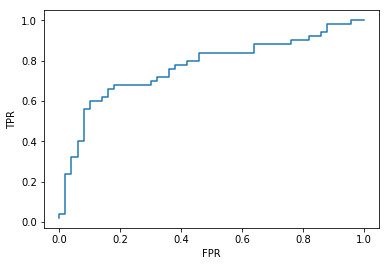

In [105]:
FPR,TPR,dataset = curva_ROC(T,F)

In [106]:
umbral = valor_umbral(FPR,TPR,dataset)
print(umbral)

Existe un solo punto umbral
[41.380781921141974]


In [74]:
TP,FP,TN,FN = matriz_confusion(umbral,T,F,dataset)
FPR = FP /(FP + TN)
print("FPR: " + str(FPR))
TPR = TP / (TP + FN)
print("TPR: " + str(TPR))
Especificidad = TN / (FP + TN)
print("Especificidad: " + str(Especificidad))
Accuracy = (TP +TN) / (TN + TP + FN + FP)
print("Accuracy: " + str(Accuracy))
Presicion = TP / (TP + FP)
print("Presicion: " + str(Presicion))
Prevalencia = (TP + FN) / (TN + TP + FN + FP)
print("Prevalencia: " + str(Prevalencia))
f_measure = (2*Presicion*TPR) / (Presicion + TPR)
print("f-measure: " + str(f_measure))
IoU = TP / (TP+FP+FN)
print("Indice Jaccard: " + str(IoU))

FPR: 0.18
TPR: 0.66
Especificidad: 0.82
Accuracy: 0.74
Presicion: 0.7857142857142857
Prevalencia: 0.5
f-measure: 0.717391304347826
Indice Jaccard: 0.559322033898305


Efectivamente, las medidas de evaluacion empeoraron cuando las curvas gausianas estan mas superpuestas.

# Ejercicio 3

Generamos el valor data set, donde T representa los valores verdaderos y F los falsos.

In [114]:
mean_1 = [0, 0]
cov_1 = [[1, 0], [0, 1]]  # diagonal covariante
#cada columna representa x e y.
T = np.random.multivariate_normal(mean_1, cov_1, 50)
mean_2 = [2, -1]
cov_2 = [[1, 0], [0, 1]]
F  = np.random.multivariate_normal(mean_2, cov_2, 50)

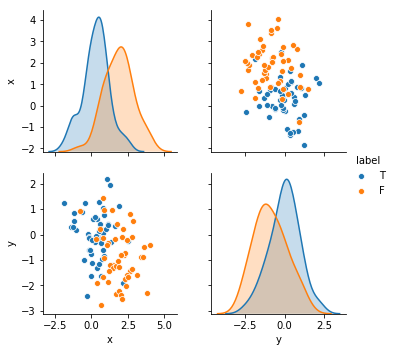

In [115]:
## hacer un data frame con T en los valores en las columnas o false para luego unirlo
TT = pd.DataFrame({"x":T[:,0],"y":T[:,1],"label":"T"},index=list(range(50)))
FF = pd.DataFrame({"x":F[:,0],"y":F[:,1],"label":"F"},index=list(range(50,100)))
frames = [TT, FF]
dataset = pd.concat(frames)
sns.pairplot(dataset,hue = "label")

Se ve como las dos gausianas en X-X y en Y-Y se superponen. Para poder encontrar el "plano umbral" que separa mi dataset, tendria que en primer lugar encontrar los centros de las gausianas. Esto se podria realizar, con algun algoritmo de clustering como k-mean o, por ahi mejor para este ejemplo, Expectation–maximization algorithm. Una vez ubicados los centros de las gausianas podemos trazar una linea que una los centros. Sobre esa linea podriamos realizar la curva ROC para encotrar el valor de umbar dentro de esa linea. Para esto, podemos ubicar un otra linea (o plano) perpedicular a la linea que une los centros de las gausianas y que pase por el valor umbral y todos los puntos dentro de un lado de esta ultima linea (o plano) van a ser o T o F. Con esto puedo calcular la curva ROC y con esto encontrar el valor umbral optimo que me determine el plano o linea umbral que me divida los datos. 